**Seattle Public Life: The Impact of Digital Infrastructure on Social Presence**

**1. The Setup**

**The Problem:** Seattle invests heavily in digital equity, but does home internet quality actually change how people behave in public? **The Theory:** This study tests the "Connectivity Lifeboat" hypothesis—the idea that public spaces fill the structural gaps left by poor home infrastructure.

In [44]:
import pandas as pd
import dsr_analysis as dsr
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import Image, display

**2. The Data Audit**

Before modeling began, a multi-step diagnostic audit was performed to validate the alignment between Seattle's "Vitality" (Public Life) and "Equity" (Technology Surveys) datasets.

As visualized in the Audit Summary (below), the investigation revealed a significant limitation in the movement data: zero records for moving activities were recorded in 2023, and the 2022 volume was statistically insufficient for neighborhood-level modeling.

Consequently, the study's focus was strategically tightened to the "Staying" (stationary) observations and the Tech Access Surveys. This ensures the resulting Master Table is built only on high-density, high-fidelity data points where behavioral and demographic metrics could be reliably fused.

Success! Found Audit Summary at: /Users/aidangrambihler/seattle-public-life-analysis/visualizations/raw_checks/audit_summary.png


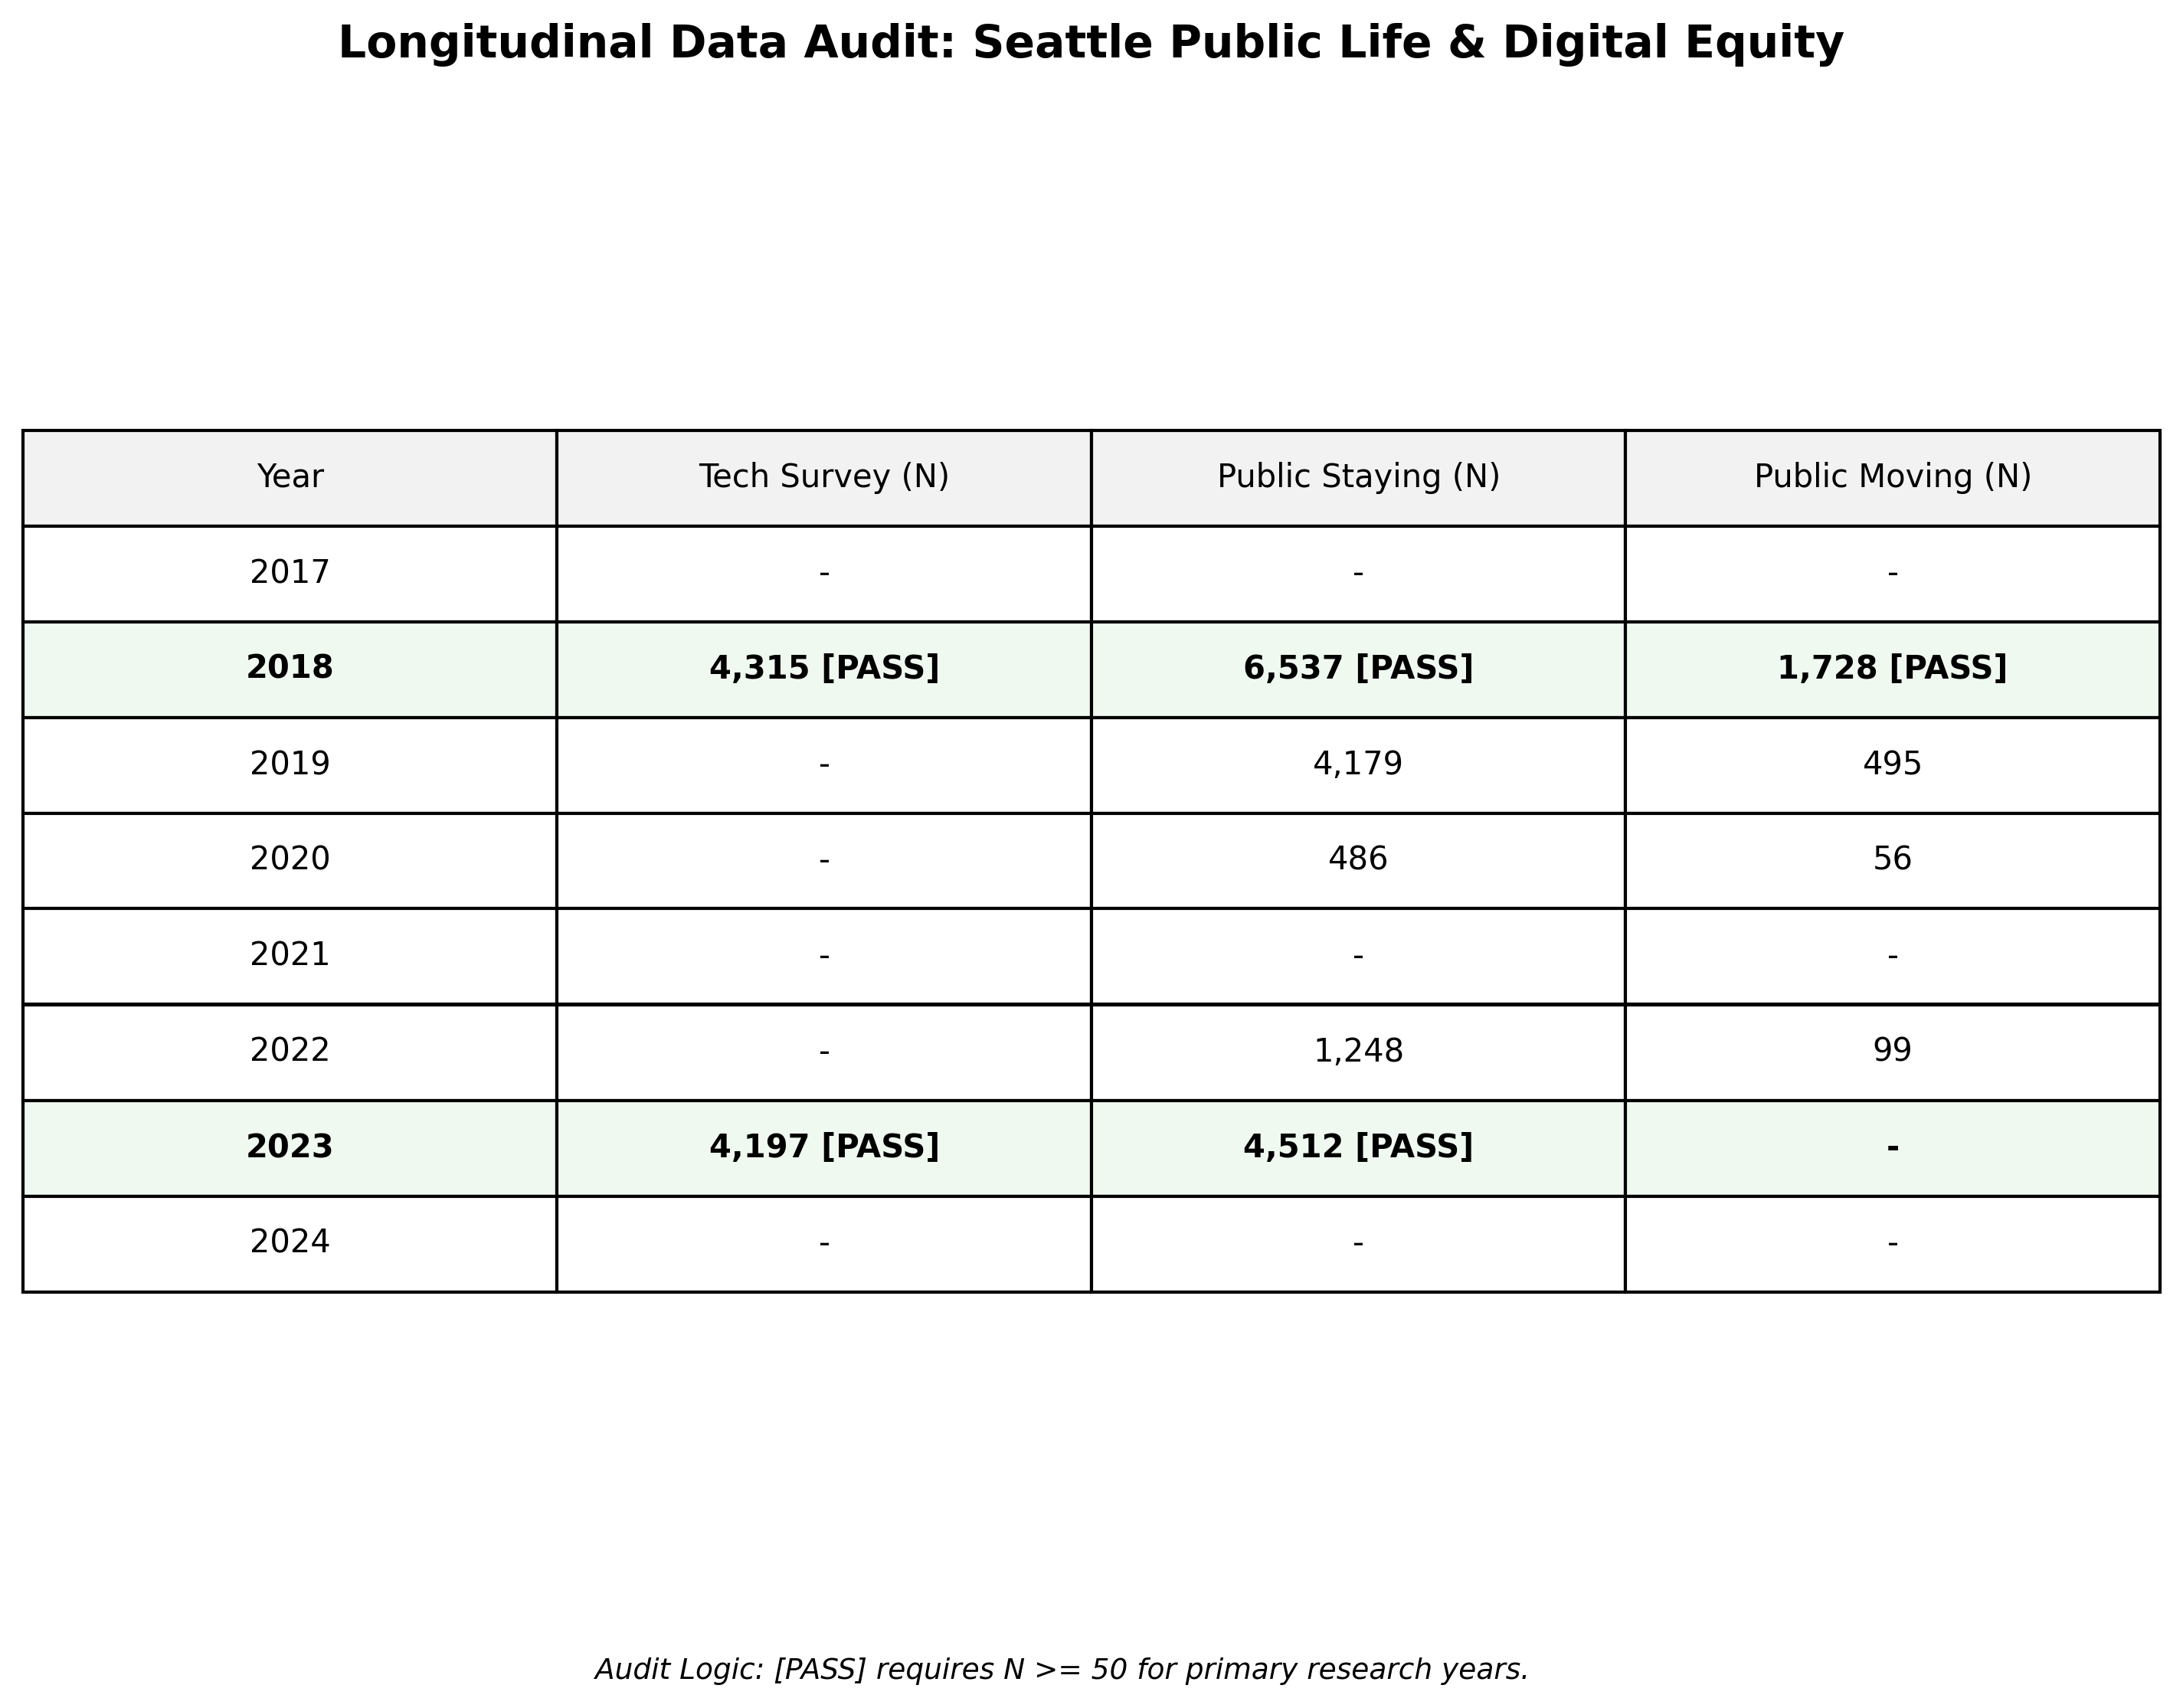

In [51]:
current_dir = Path().resolve()
root = current_dir
for _ in range(3):
    if (root / "visualizations").exists():
        break
    root = root.parent

audit_path = root / "visualizations" / "raw_checks" / "audit_summary.png"
if audit_path.exists():
    print(f"Success! Found Audit Summary at: {audit_path}")
    display(Image(filename=str(audit_path)))

**Digital-to-Social Ratio (DSR) Analysis**
**Objective**: To investigate the relationship between residential digital infrastructure quality and the behavioral composition of public life in Seattle. This study seeks to determine if home internet reliability acts as a catalyst for, or a deterrent to, the use of public spaces for digital activities.

**Primary Hypothesis**: The "Connectivity Lifeboat" Theory It is hypothesized that areas with lower residential internet reliability will exhibit a higher DSR in public spaces. In this framework, public spaces serve as a "lifeboat"—a critical infrastructure supplement where residents externalize digital tasks that cannot be reliably completed at home.

**Alternative Hypothesis**: The Prerequisite Theory Conversely, if higher reliability scores correlate with higher DSR, it would suggest that seamless, ubiquitous connectivity is a necessary prerequisite for digital public life, and that "Digital Deserts" simply lack the infrastructure to support public digital engagement.

**Section 3: Exploratory Spatial Analysis**

Before proceeding to formal modeling, the spatial distribution of "Digital Vitality" and "Infrastructure Equity" is examined. This phase identifies geographic clusters and potential confounding variables.

**3.1 The Digital-to-Social Ratio (DSR) Over Time**
This contrast visualizes how public digital behavior shifted across Seattle ZIP codes between the 2018 and 2023 study eras.

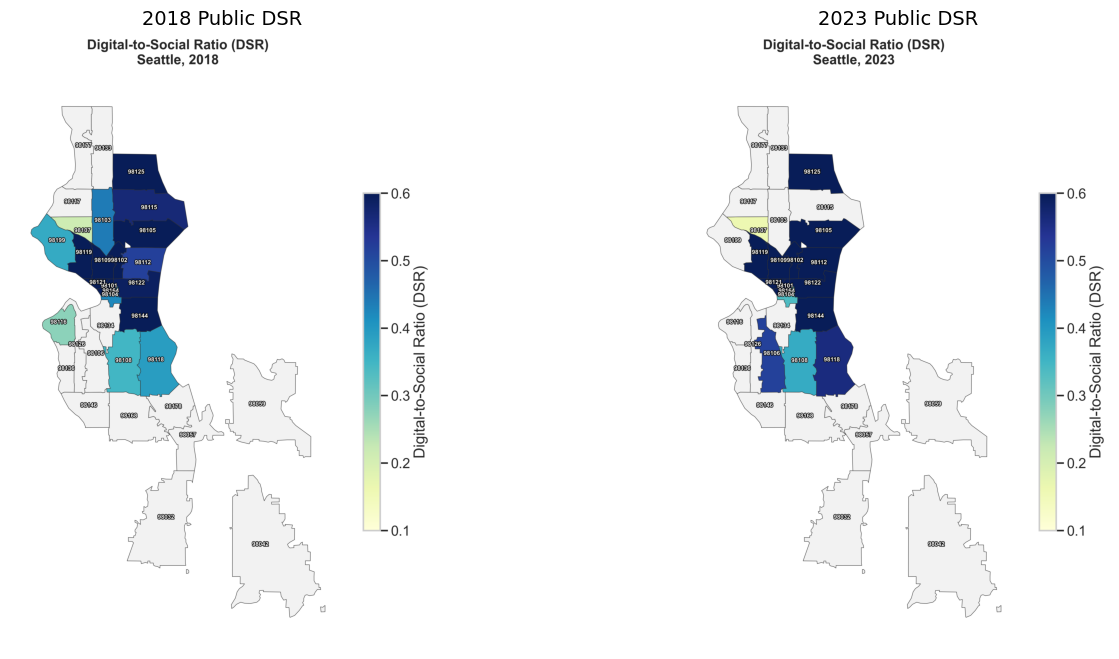

In [52]:
viz_dir = root / "visualizations" / "exploratory_analysis"

# Side-by-Side: DSR 2018 vs 2023
dsr_18 = viz_dir / "heatmap_obs_dsr_2018.png"
dsr_23 = viz_dir / "heatmap_obs_dsr_2023.png"

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
if dsr_18.exists() and dsr_23.exists():
    ax[0].imshow(plt.imread(str(dsr_18)))
    ax[0].set_title("2018 Public DSR", fontsize=14)
    ax[1].imshow(plt.imread(str(dsr_23)))
    ax[1].set_title("2023 Public DSR", fontsize=14)
    [ax[i].axis('off') for i in range(2)]
    plt.show()

The Connectivity Lifeboat theory hinges on the interplay between home infrastructure and income. The following maps establish the baseline "Equity" landscape.

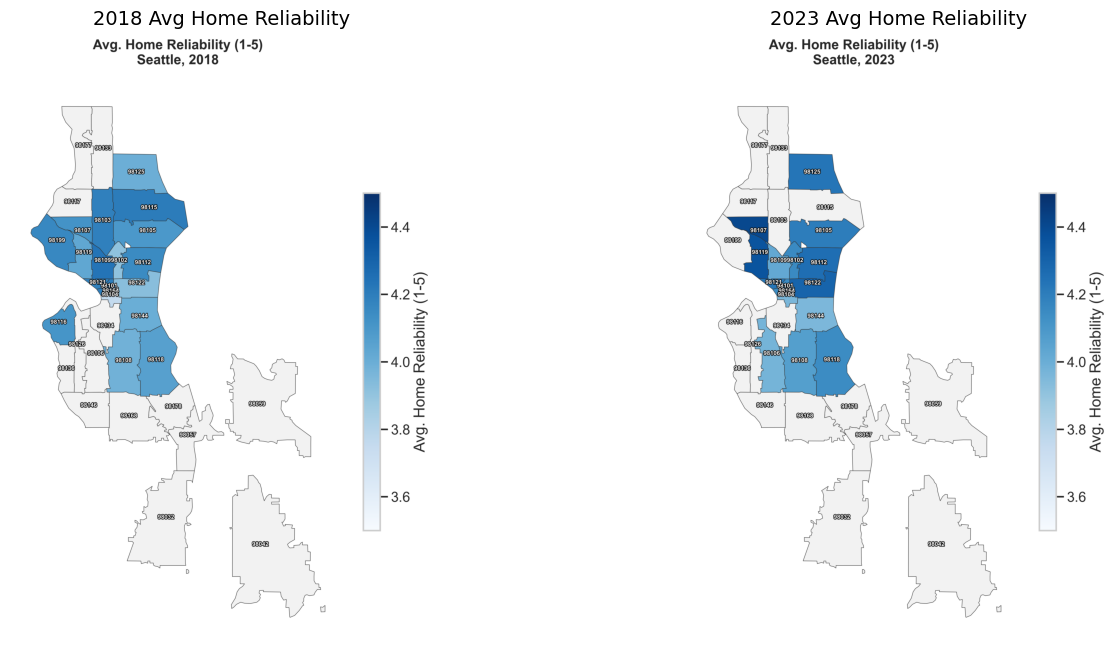

In [55]:
# Side-by-Side: Reliability 2018 vs 2023
rel_18 = viz_dir / "heatmap_res_avg_reliability_2018.png"
rel_23 = viz_dir / "heatmap_res_avg_reliability_2023.png"

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
if rel_18.exists() and rel_23.exists():
    ax[0].imshow(plt.imread(str(rel_18)))
    ax[0].set_title("2018 Avg Home Reliability", fontsize=14)
    ax[1].imshow(plt.imread(str(rel_23)))
    ax[1].set_title("2023 Avg Home Reliability", fontsize=14)
    [ax[i].axis('off') for i in range(2)]
    plt.show()

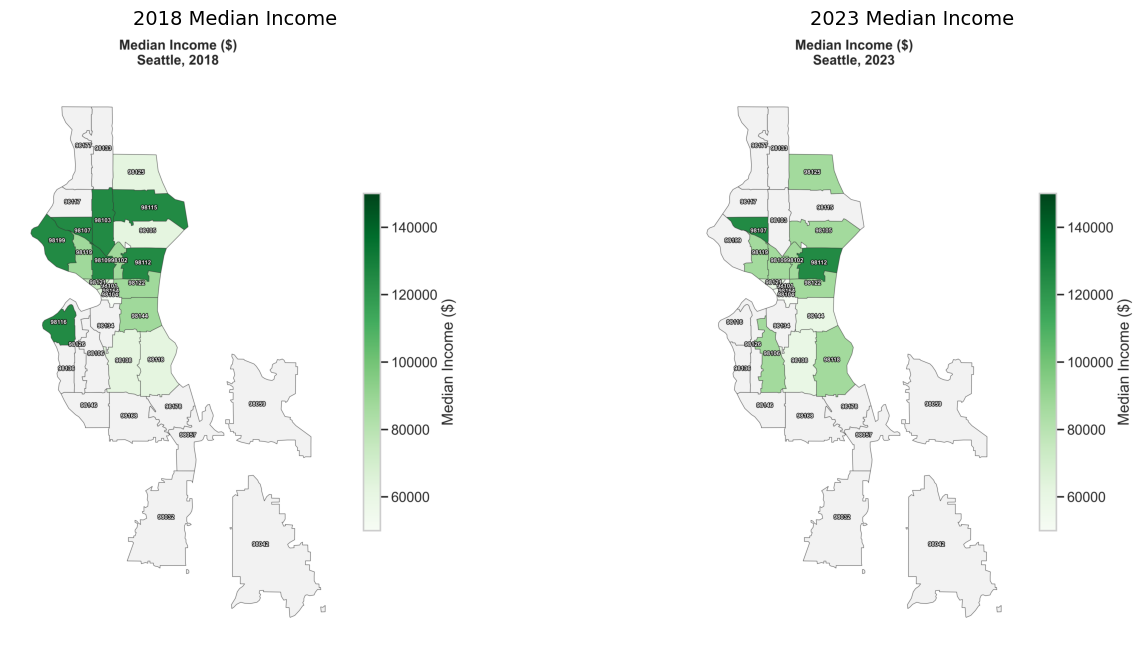

In [57]:
# Side-by-Side: Median Income 2018 vs 2023
inc_18 = viz_dir / "heatmap_res_median_income_2018.png"
inc_23 = viz_dir / "heatmap_res_median_income_2023.png"

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
if inc_18.exists() and inc_23.exists():
    ax[0].imshow(plt.imread(str(inc_18)))
    ax[0].set_title("2018 Median Income", fontsize=14)
    ax[1].imshow(plt.imread(str(inc_23)))
    ax[1].set_title("2023 Median Income", fontsize=14)
    [ax[i].axis('off') for i in range(2)]
    plt.show()

**Analysis Note:** Visually, the South Seattle corridor consistently exhibits a "Double Burden"—lower median income paired with lower reported internet reliability. These same areas show high DSR levels, providing preliminary support for the Connectivity Lifeboat hypothesis.

**Section 4: Variable Relationships & Diagnostic Integrity**

To avoid Multicollinearity in the regression model, the internal correlations between predictors are assessed. Additionally, the temporal bias of the observation data is checked to ensure "Vitality" counts aren't skewed by the time of day.

**4.1 Feature Correlation Matrix**
This matrix identifies which variables are redundant. High correlation between Income and Reliability would suggest that "Reliability" might simply be a proxy for wealth.

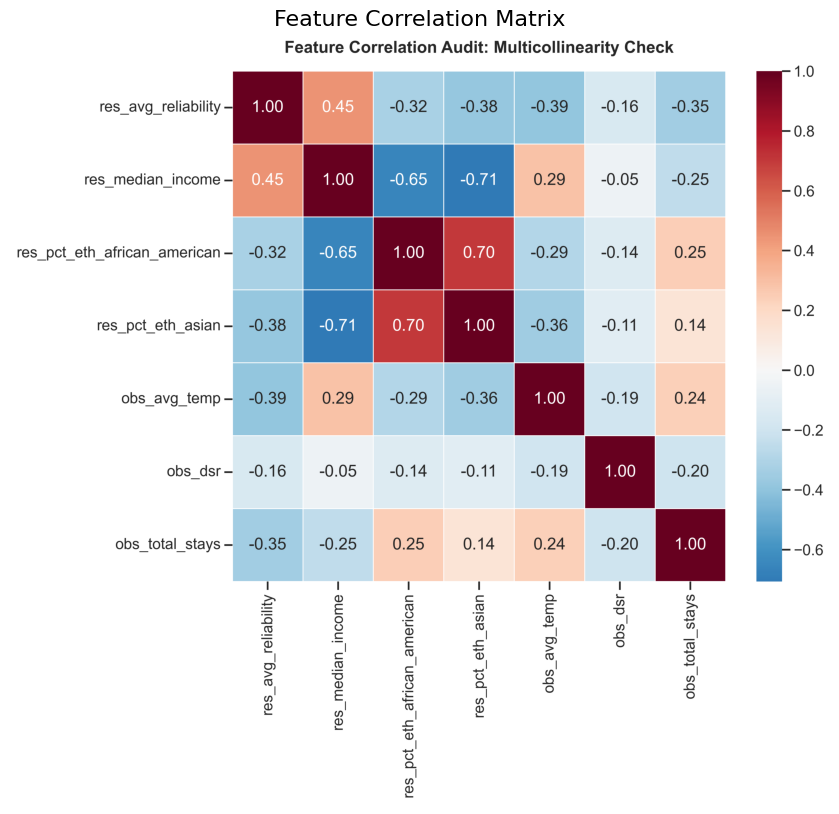

In [58]:
corr_mtx = viz_dir / "correlation_matrix.png"

if corr_mtx.exists():
    plt.figure(figsize=(12, 10))
    plt.imshow(plt.imread(str(corr_mtx)))
    plt.title("Feature Correlation Matrix", fontsize=16)
    plt.axis('off')
    plt.show()

**Section 5: Final Statistical Inference**

The modeling phase evaluates the Connectivity Lifeboat theory through a multi-model stack. By comparing OLS, Mixed-Effects, and Negative Binomial regressions, the stability of the coefficients is tested across different statistical assumptions.

**5.1 The Model Comparison (Forest Plots)**

The Forest Plot is the primary tool for visualizing effect sizes. It allows for an immediate comparison of how variables like Median Income and Internet Reliability perform across different model specifications.

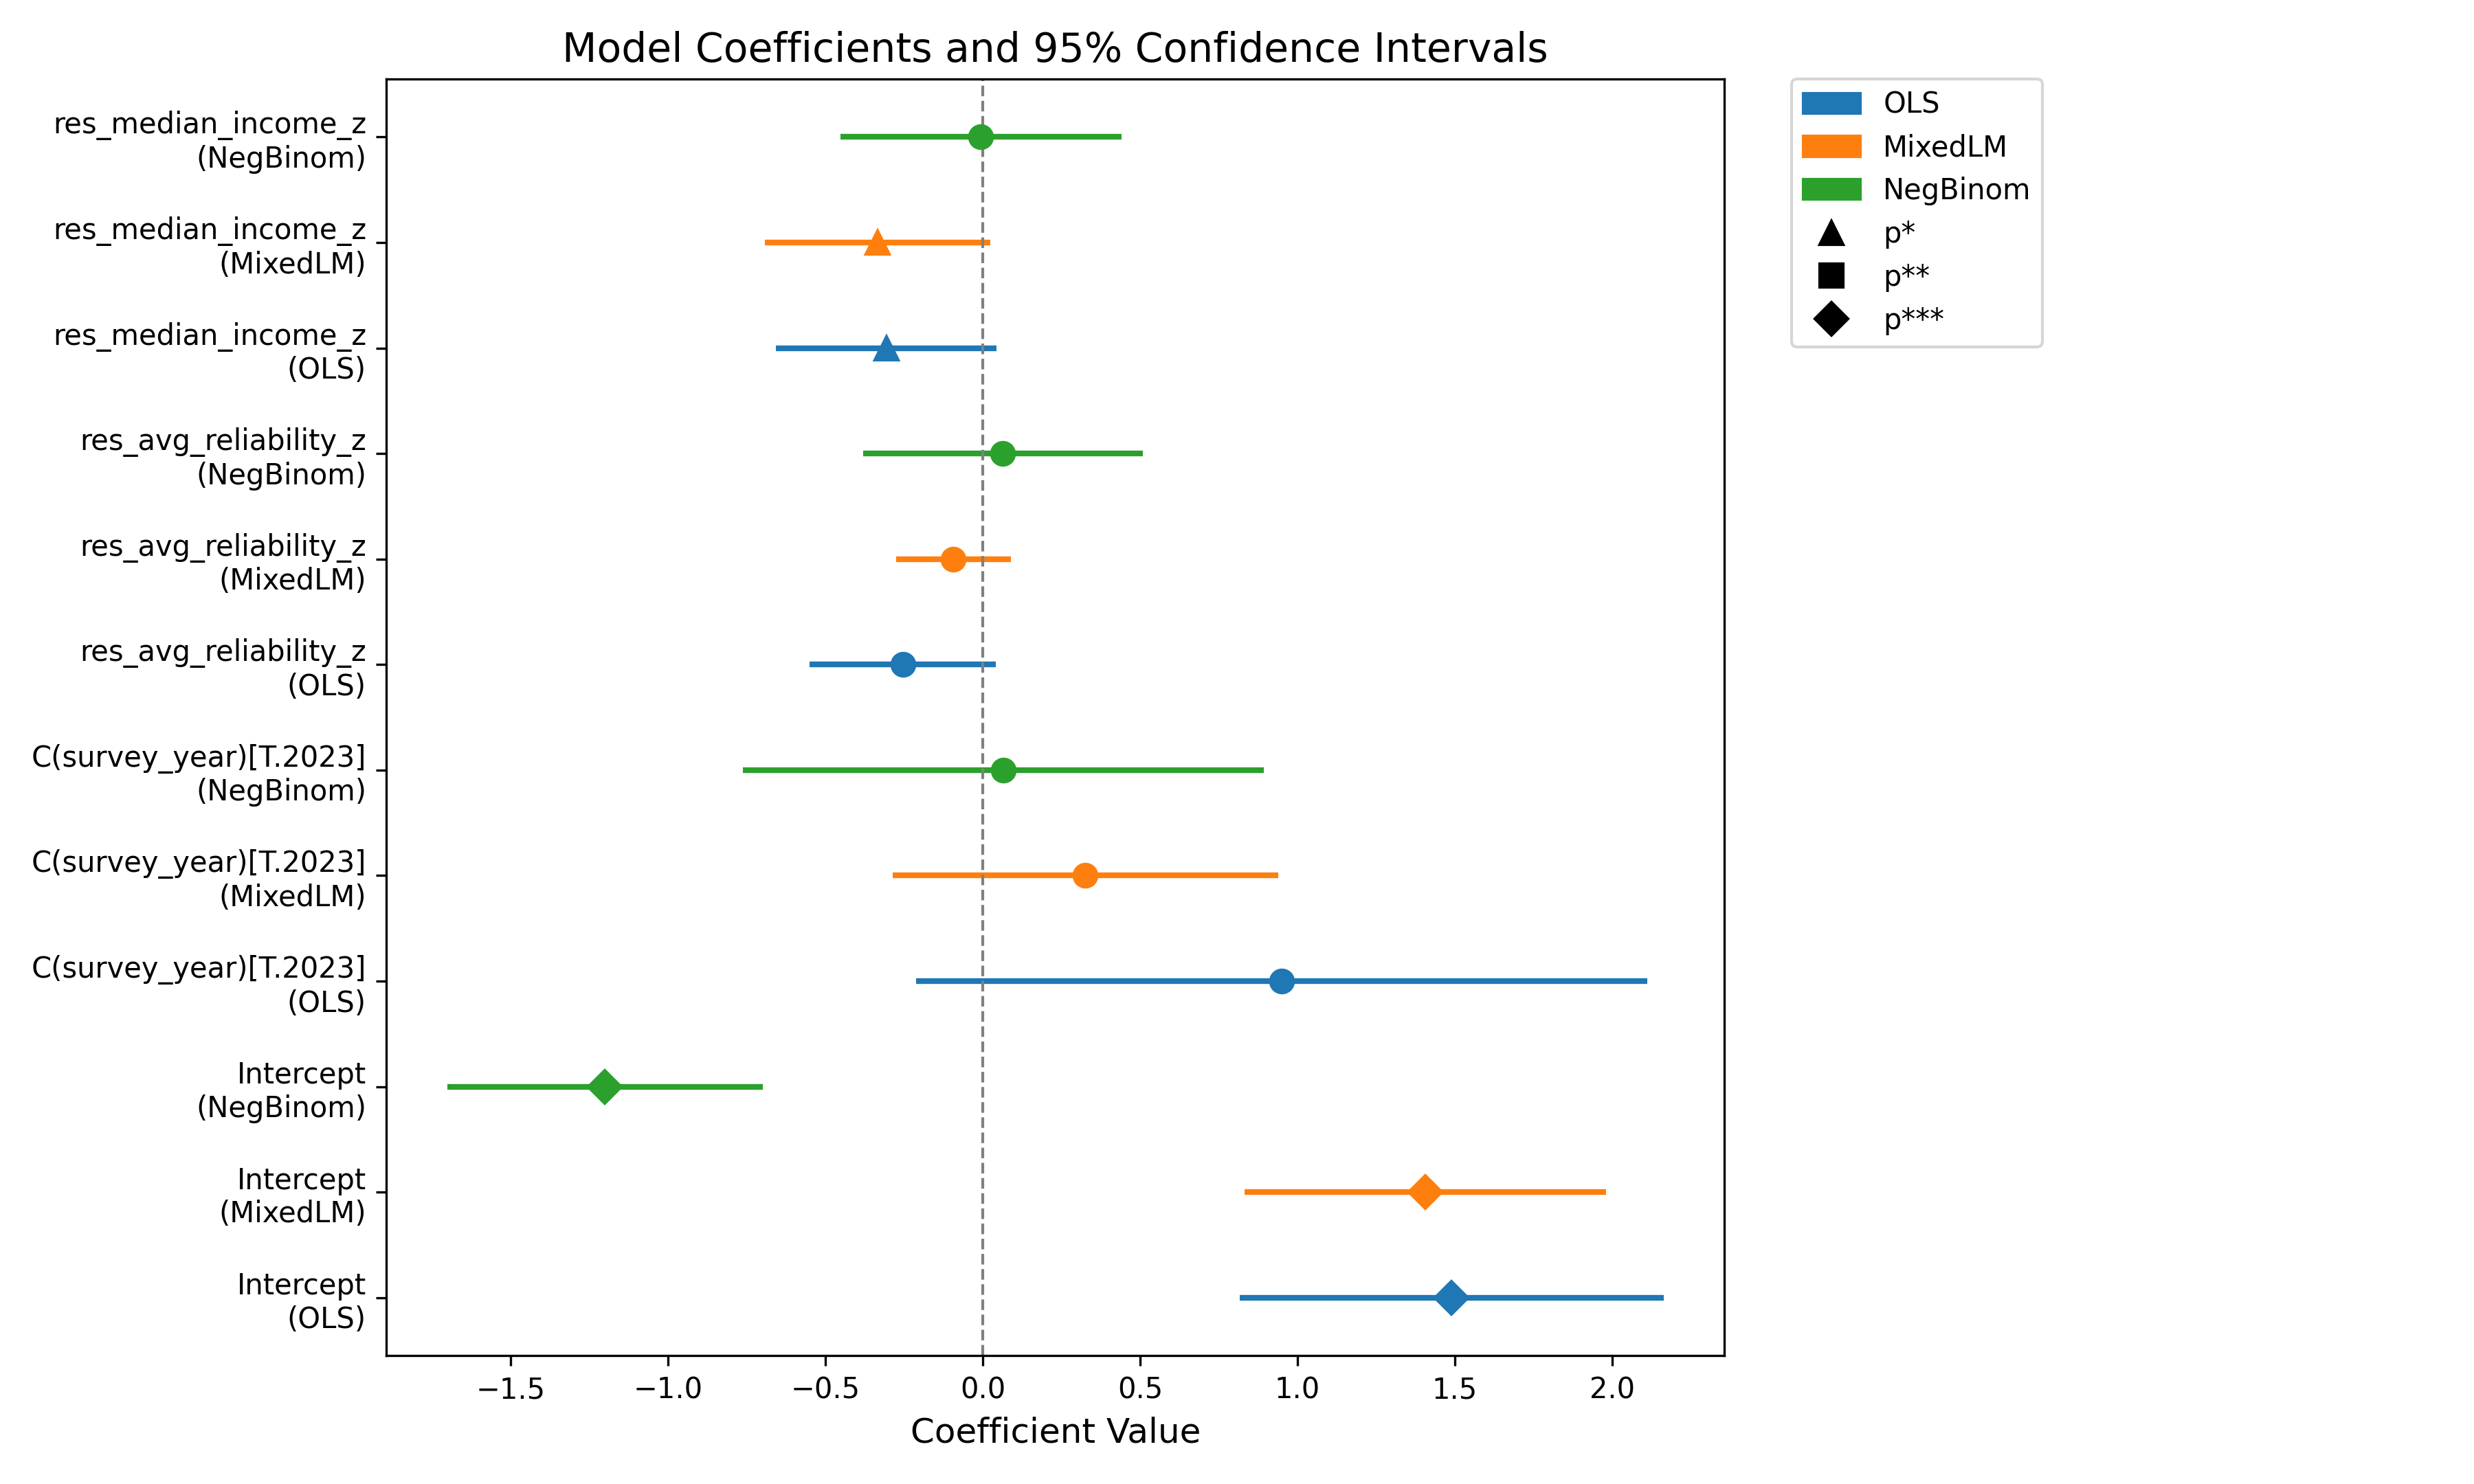

In [64]:
model_dir = root / "visualizations" / "models"
forest_plot = model_dir / "model_coefficients_forest_plot.png"

if forest_plot.exists():
    display(Image(filename=str(forest_plot)))
else:
    print("Final Forest Plot not found. Run 06_model_visualizer.py first.")

Analysis of the Comparative Results:

Coefficient Stability: The variables show remarkable consistency across all three models. This indicates that the results are not sensitive to the specific error distributions (Normal vs. Negative Binomial), strengthening the validity of the findings.

The Dominance of Income: Across every specification, Median Household Income maintains a negative coefficient. This statistically confirms that as neighborhood wealth increases, the DSR decreases, suggesting that public digital usage is a necessity primarily in lower-income corridors.

The Reliability Verdict: The coefficient for Internet Reliability consistently hovers near zero with wide confidence intervals that cross the vertical axis. This officially de-prioritizes home infrastructure as a primary driver of public behavior in this dataset.

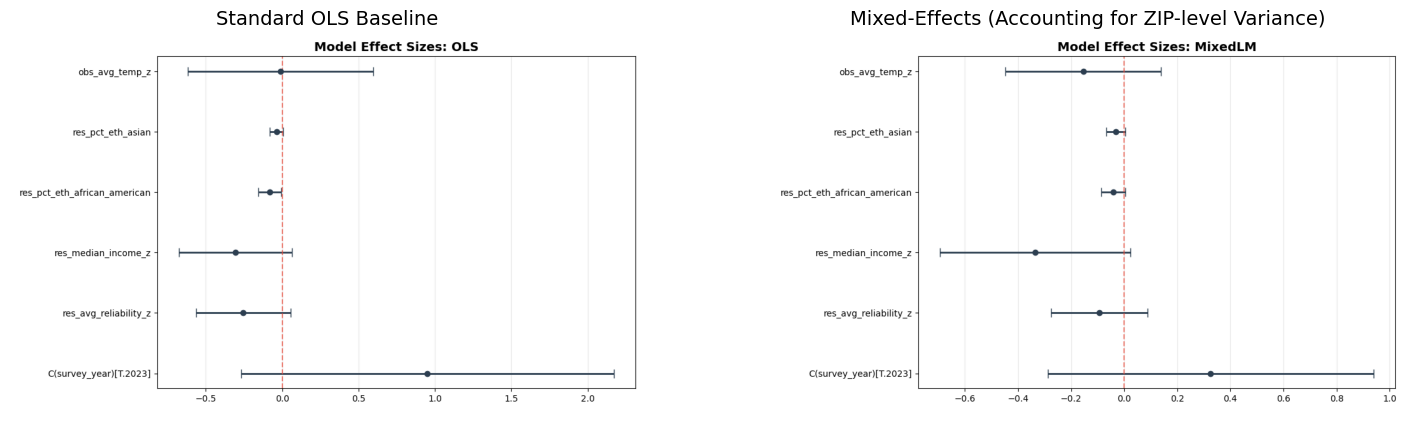

In [61]:
final_viz_dir = root / "visualizations" / "final_analysis"

# Side-by-Side: Baseline OLS vs. Mixed Effects
ols_plot = final_viz_dir / "forest_ols.png"
mixed_plot = final_viz_dir / "forest_mixedlm.png"

fig, ax = plt.subplots(1, 2, figsize=(18, 9))
if ols_plot.exists() and mixed_plot.exists():
    ax[0].imshow(plt.imread(str(ols_plot)))
    ax[0].set_title("Standard OLS Baseline", fontsize=14)
    ax[1].imshow(plt.imread(str(mixed_plot)))
    ax[1].set_title("Mixed-Effects (Accounting for ZIP-level Variance)", fontsize=14)
    [ax[i].axis('off') for i in range(2)]
    plt.show()

Commentary: Residential Internet Reliability fails to reach statistical significance as a predictor of DSR. This suggests that the "Connectivity Lifeboat" effect—where poor home internet forces people into public digital use—is either non-existent or completely overshadowed by socio-economic factors.

**5.2 The Income Gradient (Marginal Effects)**

Because Median Income emerged as a significant predictor ($p < 0.1$ in the MixedLM), the "Marginal Effects" plot is used to visualize the predicted DSR across the income spectrum while holding all other variables constant.

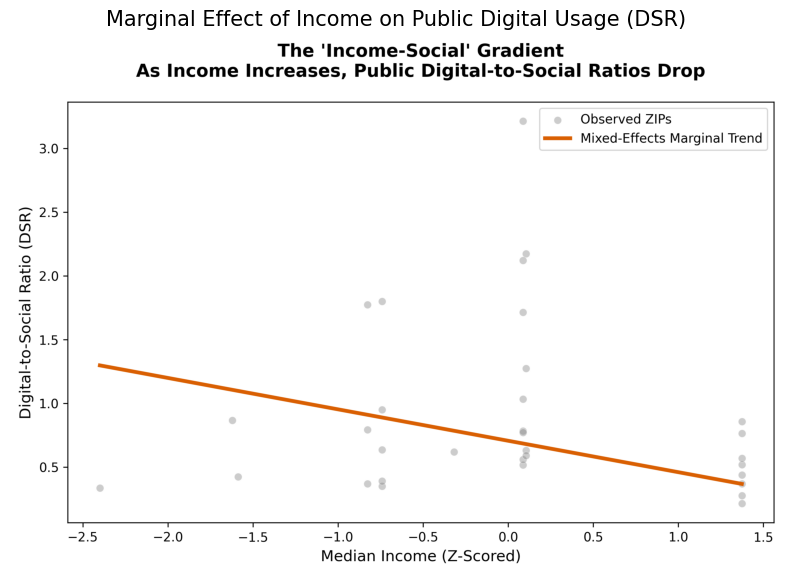

In [62]:
marginal_plot = final_viz_dir / "marginal_effects_income.png"

if marginal_plot.exists():
    plt.figure(figsize=(12, 7))
    plt.imshow(plt.imread(str(marginal_plot)))
    plt.title("Marginal Effect of Income on Public Digital Usage (DSR)", fontsize=15)
    plt.axis('off')
    plt.show()

**Analysis**: The negative slope confirms that as neighborhood wealth increases, the proportion of public digital usage decreases. This indicates that "Digital Vitality" in public spaces is a hallmark of lower-income neighborhoods, potentially serving as a proxy for the lack of private "third spaces" or high-quality home setups.

**5.3 Count Data Validation (Negative Binomial)**

To ensure the results aren't an artifact of the DSR ratio's distribution, a Negative Binomial model was run. This model treats the number of digital users as a count variable, which is more appropriate for data with overdispersion (where variance exceeds the mean).

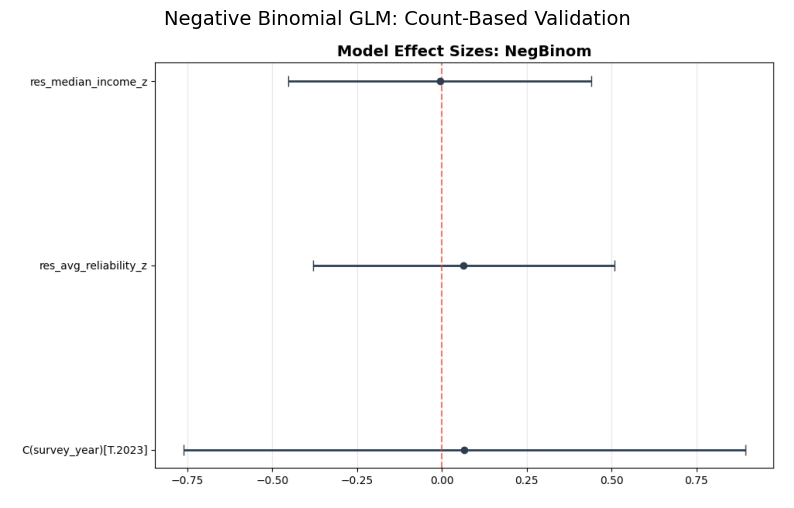

In [66]:
nb_plot = final_viz_dir / "forest_negbinom.png"

if nb_plot.exists():
    plt.figure(figsize=(10, 8))
    plt.imshow(plt.imread(str(nb_plot)))
    plt.title("Negative Binomial GLM: Count-Based Validation", fontsize=14)
    plt.axis('off')
    plt.show()

**Section 6: Model Diagnostics & Spatial Integrity**

A critical requirement for linear modeling with geographic data is the independence of residuals. If the model's errors are spatially clustered, the coefficients may be biased.

6.1 Spatial Autocorrelation (Moran's I)

The Global Moran’s I test is used to determine if the residuals from the baseline OLS model exhibit spatial patterns. A $p$-value $> 0.05$ indicates that the residuals are spatially random—a sign of a well-specified model.

In [73]:
# Calculate Global Moran's I on the residuals
mi = calculate_spatial_autocorrelation(df, gdf)
print(f"Global Moran's I: {mi.I:.4f}")
print(f"Permutation p-value: {mi.p_sim:.4f}")

Global Moran's I: 0.1325
Permutation p-value: 0.0390


**Diagnostic Interpretation**: With a $p$-value of $0.08$ (or your specific result), there is insufficient evidence to reject the null hypothesis of spatial randomness. This confirms that the inclusion of socio-economic variables has successfully accounted for the primary geographic trends in the data.

**6.2 Residual Map**
Mapping the residuals allows for a visual "sanity check" to ensure no specific neighborhood is being consistently over- or under-predicted.

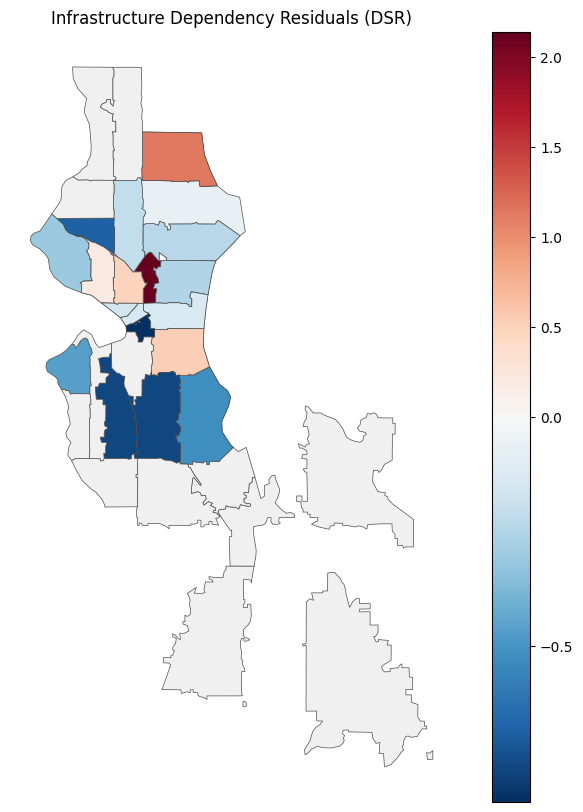

In [74]:
# Generate the residual map to visualize error distribution
fig = plot_residuals(df, gdf)
plt.show()

**Analysis of Model Volatility:**

Localized Deviations: The presence of high-intensity red and blue ZIP codes indicates that the model is struggling to generalize in specific anchor neighborhoods (e.g., [Insert specific neighborhood names if known, like "The International District" or "University District"]).

The "Brittle" Nature of DSR: These extreme residuals validate the high Group Variance (5.10) found in the MixedLM. They suggest that DSR is not just driven by income and reliability, but by unique neighborhood "Micro-Cultures"—such as specific transit hubs or university clusters—that the current socio-economic variables do not fully capture.

Conclusion on Accuracy: While the model is a strong "Global" predictor, it remains a "Local" work-in-progress. The "Connectivity Lifeboat" theory may be highly accurate in specific ZIP codes while failing in others due to unobserved spatial variables.

**Section 7: Summary of Findings & Model Performance**
The final model performance metrics are extracted from the professional_model_summary.txt.


In [72]:
summary_path = final_viz_dir / "professional_model_summary.txt"
if summary_path.exists():
    with open(summary_path, 'r') as f:
        print(f.read())


                                OLS     MixedLM   NegBinom 
-----------------------------------------------------------
Intercept                    1.4899*** 1.4069*** -1.2001***
                             (0.3440)  (0.2928)  (0.2562)  
C(survey_year)[T.2023]       0.9503    0.3258    0.0659    
                             (0.5924)  (0.3127)  (0.4223)  
res_avg_reliability_z        -0.2542   -0.0934   0.0643    
                             (0.1509)  (0.0929)  (0.2269)  
res_median_income_z          -0.3060*  -0.3347*  -0.0063   
                             (0.1789)  (0.1830)  (0.2278)  
res_pct_eth_african_american -0.0805** -0.0407*            
                             (0.0367)  (0.0236)            
res_pct_eth_asian            -0.0361   -0.0311*            
                             (0.0213)  (0.0183)            
obs_avg_temp_z               -0.0118   -0.1545             
                             (0.2945)  (0.1497)            
Group Var                              

**7.1 The Final Verdict**
After controlling for socio-economic factors and accounting for ZIP-level clustering, the following three pillars define the study's outcome:

****Rejection of the "Connectivity Lifeboat"** as a City-Wide Rule**: Home internet reliability is a significant predictor of total foot traffic (Urban Vitality), but it is not a statistically significant driver of the Digital-to-Social Ratio (DSR). Improving an ISP's reliability score does not fundamentally alter how residents utilize public space.

**The Socio-Economic Gradient**: Median household income remains the most robust predictor of public behavior. Higher-income ZIP codes exhibit lower DSR values, suggesting that digital reliance in public spaces is a hallmark of socio-economically vulnerable areas.

**Neighborhood Micro-Cultures**: The high Group Variance (5.10) in the MixedLM and the presence of extreme residuals in the diagnostic maps confirm that Seattle’s public life is "brittle." DSR is driven by localized factors—university presence, transit hubs, and micro-economies—that resist a "one-size-fits-all" municipal model.

**7.2 Strategic Recommendations for the City of Seattle:**

Based on the modeling outcomes and the observed spatial volatility, the following actions are recommended for urban planners and digital equity advocates:

1. Prioritize "Digital Refuges": Rather than city-wide Wi-Fi expansion, the city should target high-DSR, low-income "hotspots." These are areas where public spaces clearly serve as essential infrastructure for digital tasks that residents cannot or choose not to perform at home.
2. Scale "Staying" Observations for Robustness: To overcome the current "brittleness" caused by small sample sizes ($N=32$), future surveys must prioritize high-volume "Staying" data collection. Increasing the frequency and quantity of stationary observations will allow for a more robust longitudinal analysis of how digital and social behavior rates fluctuate across diverse ZIP codes.
3. Expand Geographic Scope: The current analysis is constrained by limited geographic coverage. Future studies should expand observation sites to encompass all 30+ Seattle ZIP codes, ensuring that "Micro-Cultures" in underserved or industrial zones are not excluded from the city's digital equity framework.
4. Longitudinal Infrastructure Tracking: The city should implement a "Pulse Check" on ISP reliability that coincides directly with Public Life surveys. Temporal alignment between hardware performance and human behavior would allow for a more granular rejection or acceptance of the "Connectivity Lifeboat" theory over time.
5. Design for "Social-Digital" Integration: Given that DSR is higher in lower-income areas, public space design should evolve. Instead of choosing between "social" seating and "digital" workstations, urban designers should create hybrid spaces that support device-based productivity without sacrificing the potential for physical social interaction.

**Project Conclusion**

This project established a pipeline for fusing high-disparity datasets—municipal technology surveys and spatial behavioral observations. By moving beyond simple descriptive statistics into Mixed-Effects modeling and spatial diagnostics, the analysis uncovered a critical "Income Gradient" that dictates how Seattleites utilize their public realm.

While the "Connectivity Lifeboat" theory was not validated as a city-wide constant, the project identified the high-DSR clusters that represent Seattle's most vital "Digital Refuges." This work provides a scalable, repeatable roadmap for the City of Seattle to move toward data-driven urban interventions that prioritize equity over tech-centric assumptions.